In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy import optimize
import sympy as sym
from sympy.plotting import plot
import numpy as np

%matplotlib inline

In [2]:
layer=1
equi_n=[4,16,16,8,16,4,16]
n_equi=len(equi_n)
n_atom=sum(equi_n)*layer
p_n_atom=108
ss0=(4.0414*1.5866695003000000)**2

In [3]:
M=26.98
hbar=4.136*10**(-15)/2/math.pi
har=4.136*10**(-15)
kb=8.617 * 10**(-5)
Na=6.0221367*10**(23)

In [4]:
ev=1.60218*10**(-19) #J

In [5]:
perfect=[
 [ -2, n_atom, -401.38909,    2.91414,    2.91400,    2.91414],
    [ 0, n_atom, -403.18033,    2.27343,    2.27300,    2.27243],
    [ 2, n_atom, -401.89254,    1.87579,    1.87571,    1.87557],
    [ 4, n_atom, -398.11977,    1.42171,    1.42157,    1.42193]]

In [6]:
X=[]
Y=[]
for data in perfect:
    X.append(data[0]/100)
    Y.append(data[3])

## fitting

https://qiita.com/maskot1977/items/e4f5f71200180865986e

In [7]:
def func3(X, a, b, c, d): # 3次式近似
    Y = a + b * X + c * X ** 2 + d * X ** 3
    return Y

In [8]:
def func2(X, a, b, c): # 2次式近似
    Y = a + b * X + c * X ** 2
    return Y

In [9]:
popt, pcov = curve_fit(func2,X,Y) # poptは最適推定値、pcovは共分散
popt

array([  2.3183565 , -26.70752507, 116.64375325])

In [10]:
x=sym.symbols('x')

In [11]:
ks=popt[0]+popt[1]*x+popt[2]*x**2
ks

116.643753250296*x**2 - 26.7075250691843*x + 2.31835649874167

In [12]:
xx = np.linspace(-0.04, 0.06, 100)
yy=[]
for _x  in xx:
    yy.append(ks.subs(x,_x))

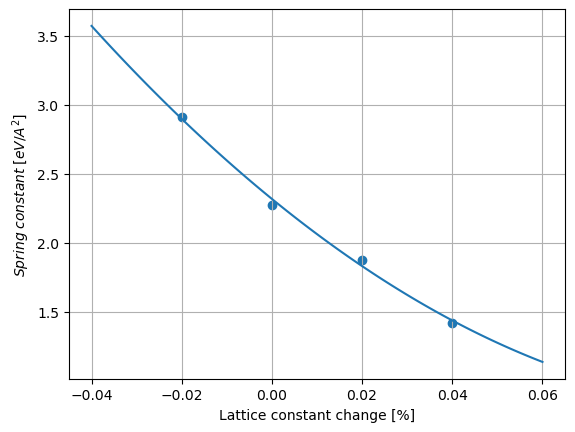

In [13]:
fig, ax = plt.subplots()
ax.set_xlabel('Lattice constant change [%]')  # x軸ラベル
ax.set_ylabel(r"$Spring\;constant\;[eV/A^2]$")  # y軸ラベル
# ax.set_title(r'$\sin(x)$ and $\cos(x)$') # グラフタイトル
ax.grid() 
ax.plot(xx,yy)
ax.scatter(X,Y)

In [14]:
X=[]
Y=[]
for data in perfect:
    X.append(data[0]/100)
    Y.append(data[2])

In [15]:
popt, pcov = curve_fit(func3,X,Y) # poptは最適推定値、pcovは共分散
popt

/Users/kyohei/miniforge3/envs/lab/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([-4.03180330e+02, -7.63583333e+00,  3.84878750e+03, -1.23760417e+04])

In [16]:
e0=popt[0]+popt[1]*x+popt[2]*x**2+popt[3]*x**3
e0

-12376.0416666693*x**3 + 3848.78750000012*x**2 - 7.63583333333341*x - 403.18033

In [17]:
xx = np.linspace(-0.04, 0.06, 100)
yy=[]
for _x  in xx:
    yy.append(e0.subs(x,_x))

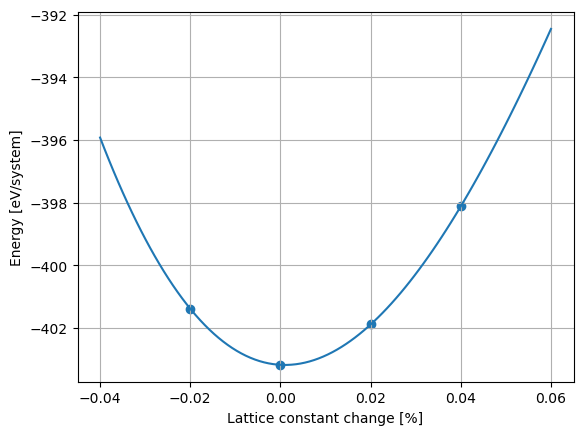

In [18]:
fig, ax = plt.subplots()
ax.set_xlabel('Lattice constant change [%]')  # x軸ラベル
ax.set_ylabel('Energy [eV/system]')  # x軸ラベル
# ax.set_title(r'$\sin(x)$ and $\cos(x)$') # グラフタイトル
ax.grid() 
ax.plot(xx,yy)
ax.scatter(X,Y)

In [19]:
def p_FreeE(vol,Temp):
    k=ks.subs(x,vol)
    KK=2*k*ev*(10**(10))**2 #J/m^2
    nu=1/(2*math.pi)*sym.sqrt(KK/(M*10**(-3)/Na)); #frequency, omega:angular velocity
    ee=har*nu/(kb*Temp)
    FF1=-kb*Temp*sym.log(sym.exp(-ee/2)/(1-sym.exp(-ee)))
    return e0.subs(x,vol)/p_n_atom+3*FF1

In [20]:
vol=sym.symbols('vol')

In [21]:
X0=np.linspace(-0.025,0.045,100);

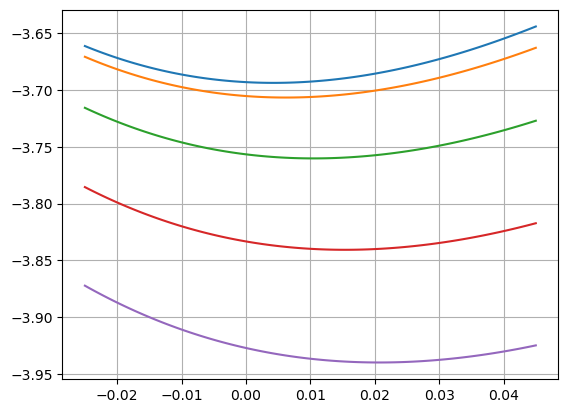

In [22]:
fig, ax = plt.subplots()
ax.grid() 
for T in [10,200,400,600,800]:
    lambdifyFunc = sym.lambdify(vol, p_FreeE(vol,T))
    ax.plot(X0,lambdifyFunc(X0))

In [23]:
def bisection(func,x0,x1,loop=10):
    f0=func.subs(vol,x0)
    f1=func.subs(vol,x1)
    for i in range(loop):
        x_tmp=(x0+x1)/2
        f_tmp=func.subs(vol,x_tmp)
        if f0.evalf()<f1.evalf():
            x1=x_tmp
            f1=f_tmp
        else:
            x0=x_tmp
            f0=f_tmp
    return x_tmp

In [24]:
sol0=[]
t_v=[]
for temp in [1,10,20,40,60,100,200,300,400,500,600,700,800]:
    eq=p_FreeE(vol,temp)
    vol0=bisection(eq,0.0,0.04,100)
    sol0.append([vol0,p_FreeE(vol0,temp)])
    t_v.append([temp,vol0])

In [25]:
sol0

[[0.0042869853229785815, -3.69358724905472],
 [0.004286984205245972, -3.69358724905472],
 [0.0042869842052278544, -3.69358725038638],
 [0.004290344715118409, -3.69359249860059],
 [0.004329412132501603, -3.69368631264726],
 [0.004623675346374511, -3.69486556310544],
 [0.006192402839660643, -3.70651043104879],
 [0.008233994990587239, -3.72915813617862],
 [0.010481211990118023, -3.76014316480208],
 [0.01286791324615457, -3.79769937191575],
 [0.015373406335729669, -3.84067919092439],
 [0.017990927100181332, -3.88829376224803],
 [0.02071860299445688, -3.93997317956603]]

In [26]:
t_v

[[1, 0.0042869853229785815],
 [10, 0.004286984205245972],
 [20, 0.0042869842052278544],
 [40, 0.004290344715118409],
 [60, 0.004329412132501603],
 [100, 0.004623675346374511],
 [200, 0.006192402839660643],
 [300, 0.008233994990587239],
 [400, 0.010481211990118023],
 [500, 0.01286791324615457],
 [600, 0.015373406335729669],
 [700, 0.017990927100181332],
 [800, 0.02071860299445688]]

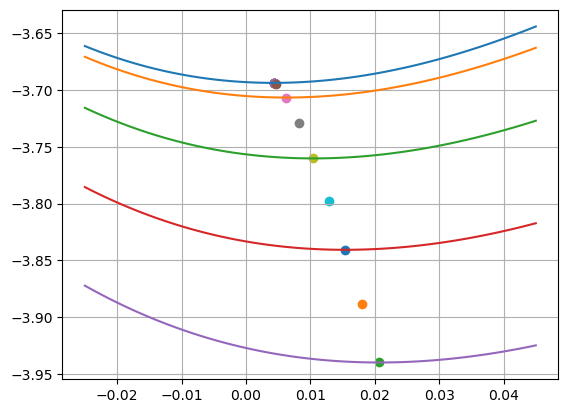

In [27]:
fig, ax = plt.subplots()
ax.grid() 
for T in [10,200,400,600,800]:
    lambdifyFunc = sym.lambdify(vol, p_FreeE(vol,T))
    ax.plot(X0,lambdifyFunc(X0))
for i in range(len(sol0)):
    ax.scatter(sol0[i][0],sol0[i][1])

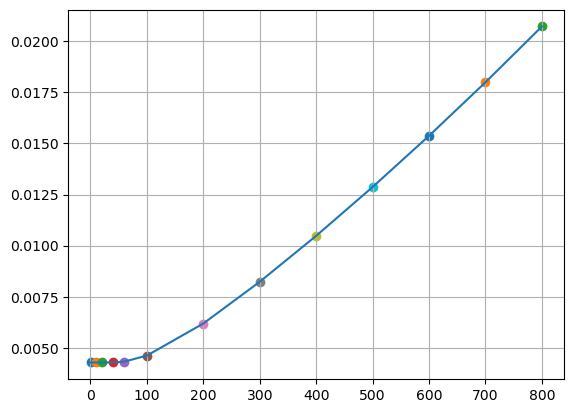

In [28]:
fig, ax = plt.subplots()
ax.grid() 
X=[]
Y=[]
for i in range(len(t_v)):
    X.append(t_v[i][0])
    Y.append(t_v[i][1])
    ax.scatter(t_v[i][0],t_v[i][1])
    
ax.plot(X,Y)

In [29]:
-720/200

-3.6

In [30]:
#<MatchData " volume= 0.960" 1:" 0.960">
# for multiple volume calcs

# data_source: ["ein_3x3_longer_v096.o5493"]
# [no,        E_0,        k_x,        k_y,        k_z],
vol_m4=[
[ 0, n_atom, -291.93527,    2.39750,    2.39421,    2.73857],
[ 5, n_atom, -291.93530,    3.49957,    3.81807,    3.44557],
[11, n_atom, -291.93533,    3.70157,    3.47471,    3.52043],
[10, n_atom, -291.93535,    3.55407,    3.55114,    3.63700],
[15, n_atom, -291.93529,    3.58900,    3.63436,    3.65264],
[ 7, n_atom, -291.93525,    3.65343,    3.64943,    3.95564],
[ 1, n_atom, -291.93535,    3.44107,    3.07529,    4.48757]]
    
#<MatchData " volume= 0.980" 1:" 0.980">
# for multiple volume calcs

# data_source: ["ein_3x3_longer_v098.o5492"]
# [no,        E_0,        k_x,        k_y,        k_z],
vol_m2=[
[ 0, n_atom, -295.80180,    1.87379,    1.87379,    2.11786],
[ 5, n_atom, -295.80184,    2.80064,    3.06157,    2.75143],
[11, n_atom, -295.80182,    2.96121,    2.76779,    2.81993],
[10, n_atom, -295.80185,    2.83679,    2.83579,    2.90871],
[15, n_atom, -295.80181,    2.87293,    2.90757,    2.93521],
[ 7, n_atom, -295.80180,    2.93050,    2.92914,    3.18114],
[ 1, n_atom, -295.80189,    2.76443,    2.48600,    3.66664]]

#<MatchData " volume= 1.000" 1:" 1.000">
# for multiple volume calcs

# data_source: ["ein_3x3_longer_v100.o5491"]
# [no,        E_0,        k_x,        k_y,        k_z],
vol_0=[
[ 0, n_atom, -296.86978,    1.43493,    1.43400,    1.60607],
[ 5, n_atom, -296.86979,    2.22271,    2.43321,    2.16993],
[11, n_atom, -296.86979,    2.34300,    2.18200,    2.22979],
[10, n_atom, -296.86978,    2.24536,    2.24543,    2.29286],
[15, n_atom, -296.86978,    2.26579,    2.29371,    2.32950],
[ 7, n_atom, -296.86977,    2.32300,    2.32057,    2.52629],
[ 1, n_atom, -296.86986,    2.19079,    1.98714,    2.96821]]

#<MatchData " volume= 1.020" 1:" 1.020">
# for multiple volume calcs

# data_source: ["ein_3x3_longer_v102.o5490"]
# [no,        E_0,        k_x,        k_y,        k_z],
vol_2=[
[ 0, n_atom, -295.57690,    1.06729,    1.07093,    1.17514],
[ 5, n_atom, -295.57689,    1.72036,    1.89257,    1.66329],
[11, n_atom, -295.57691,    1.81221,    1.66157,    1.70800],
[10, n_atom, -295.57687,    1.72529,    1.72757,    1.75729],
[15, n_atom, -295.57689,    1.73971,    1.77007,    1.80043],
[ 7, n_atom, -295.57686,    1.79293,    1.80521,    1.94850],
[ 1, n_atom, -295.57692,    1.68557,    1.54250,    2.35557]]

#<MatchData " volume= 1.040" 1:" 1.040">
# for multiple volume calcs

# data_source: ["ein_3x3_longer_v104.o5489"]
# [no,        E_0,        k_x,        k_y,        k_z],
vol_4=[
[ 0, n_atom, -292.62735,    0.77414,    0.77743,    0.82679],
[ 5, n_atom, -292.62812,    1.36200,    1.48636,    1.26664],
[11, n_atom, -292.62794,    1.37957,    1.25614,    1.27321],
[10, n_atom, -292.62806,    1.31321,    1.31443,    1.39600],
[15, n_atom, -292.62810,    1.38429,    1.37721,    1.38500],
[ 7, n_atom, -292.62803,    1.36129,    1.35964,    1.56900],
[ 1, n_atom, -292.62821,    1.36164,    1.22000,    1.91307]]

In [31]:
ks_all_data=[[-0.04,vol_m4],[-0.02, vol_m2],[0,vol_0],[0.02,vol_2],[0.04,vol_4]]
# ks_all_data=[[-0.04, vol_m4],[-0.02, vol_m2],[0,vol_0],[0.02,vol_2],[0.04,vol_4]]

In [32]:
def second_or_third(x_data,y_data,poly):
    if poly=='second':
        popt, pcov = curve_fit(func2,x_data,y_data) 
        eq_fit=popt[0]+popt[1]*x+popt[2]*x**2
    elif poly=='third':
        popt, pcov = curve_fit(func3,x_data,y_data) 
        eq_fit=popt[0]+popt[1]*x+popt[2]*x**2+popt[3]*x**3
    return eq_fit

In [33]:
def point_plot(x_data,y_data):
    fig, ax = plt.subplots()
    ax.grid() 
    ax.scatter(x_data,y_data)
    plt.close(fig)
    return fig

def curve_plot(f,x_min,x_max):
    xx = np.linspace(x_min, x_max, 100)
    yy=[]
    for _x  in xx:
        yy.append(f.subs(x,_x))
    fig, ax = plt.subplots()
    ax.grid() 
    ax.plot(xx,yy)
    plt.close(fig)
    return fig

def point_curve_plot(x_data,y_data,f,x_min,x_max):
    xx = np.linspace(x_min, x_max, 100)
    yy=[]
    for _x  in xx:
        yy.append(f.subs(x,_x))
    fig, ax = plt.subplots()
    ax.grid() 
    ax.plot(xx,yy)
    ax.scatter(x_data,y_data)
    plt.close(fig)
    return fig

In [34]:
colors=['','','','blue','blue','red','green']

In [35]:
def plot_e0_ks(i_site,e0_poly,ks_poly):
    site_plots=[]
    ks_fig, ks_ax = plt.subplots()
    ks_ax.grid() 
    for j in range(2,6):
        data=[[],[]]
        for element in ks_all_data:
            data[0].append(element[0])
            data[1].append(element[1][i_site][j])
        if j==2:
            f1=second_or_third(data[0],data[1],e0_poly)
            p1=point_curve_plot(data[0],data[1],f1,-0.03,0.05)
        else:
            f1=second_or_third(data[0],data[1],ks_poly)
            p1=point_curve_plot(data[0],data[1],f1,-0.03,0.05)
            
            ks_ax.scatter(data[0],data[1],color=colors[j])
            xx = np.linspace(-0.03,0.05, 100)
            yy=[]
            for _x  in xx:
                yy.append(f1.subs(x,_x))
            ks_ax.plot(xx,yy,color=colors[j])
            plt.close(ks_fig)
        site_plots.append(p1)
    return site_plots,ks_fig

In [36]:
def fitting_select(e0_poly,ks_poly):
    all_d=[]
    for i in range(n_equi):
        i_data=[]
        for j in range(2,6):
            data=[[],[]]
            for element in ks_all_data:
                data[0].append(element[0])
                try:
                    data[1].append(element[1][i][j])
                except IndexError as e:
                    print(len(element[1]))
            if j==2:
                func=second_or_third(data[0],data[1],e0_poly)
            else:
                 func=second_or_third(data[0],data[1],ks_poly)
            i_data.append(func)
        all_d.append(i_data)
    return all_d

In [37]:
all_d=fitting_select('second','second')

In [38]:
all_d[0]

[2855.8964285726*x**2 - 5.79630000048495*x - 296.846937142857,
 95.0607143811074*x**2 - 20.2660999993114*x + 1.43348142849511,
 94.7428571467901*x**2 - 20.182100000604*x + 1.43427771428037,
 111.71071363779*x**2 - 23.8314000003846*x + 1.60351742908977]

In [39]:
def boundary_site_FreeE(vol,Temp,ii,xyz):
    k=all_d[ii][xyz]
    k=k.subs(x,vol)
    KK=2*k*ev*(10**(10))**2 #J/m^2
    nu=1/(2*math.pi)*sym.sqrt(KK/(M*10**(-3)/Na)); #frequency, omega:angular velocity
    ee=har*nu/(kb*Temp)
    FF1=-kb*Temp*sym.log(sym.exp(-ee/2)/(1-sym.exp(-ee)))
    e0=all_d[ii][0]
    return (e0.subs(x,vol)/(n_atom*3)+FF1)*layer

In [40]:
def boundary_total(vol,temp):
    sum0=0.0
    for i in range(n_equi):
        for xyz in range(1,4):
            sum0+=equi_n[i]*boundary_site_FreeE(vol,temp,i,xyz)
    return sum0

In [41]:
bb=boundary_total(t_v[0][1],t_v[0][0])
bb

-293.736497498007

In [42]:
p0=p_FreeE(t_v[0][1],t_v[0][0])*n_atom
p0

-295.486979924378

In [43]:
bb-p0

1.75048242637081

In [44]:
p_FreeE(t_v[0][1],t_v[0][0])

-3.69358724905472

In [45]:
def boundary_total_min(volume,t):
    eq=sym.diff(boundary_total(vol,100),vol)
    vol0=bisection(eq,0.0,0.04,100)
    return [boundary_total(vol0,t),vol0]

In [46]:
def defect_energy(temp,vol):
    bb=boundary_total(vol,temp)
    p0=p_FreeE(vol,temp)*n_atom
    d_ene=bb-p0
    return [temp,d_ene,vol]

In [47]:
t_b=[]
rev_t_v=[]
for i in range(len(t_v)):
    tmp=defect_energy(t_v[i][0],t_v[i][1])
    t_b.append([tmp[0],tmp[1].evalf()])
    rev_t_v.append([t_v[i][0],tmp[2]])

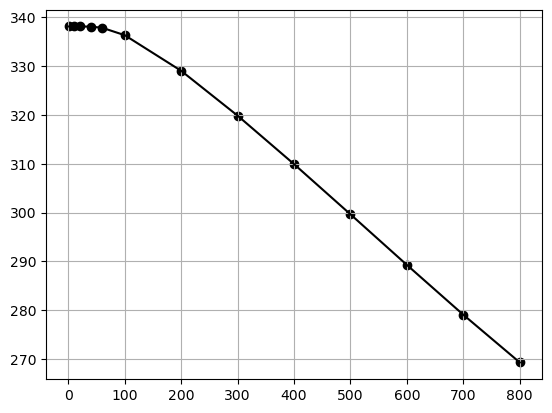

In [80]:
fig, ax = plt.subplots()
ax.grid() 
X=[]
Y=[]
for i in range(len(t_b)):
    X.append(t_b[i][0])
    Y.append(t_b[i][1])
    ax.scatter(t_b[i][0],t_b[i][1],color='black')
    
ax.plot(X,Y,color='black')

In [49]:
t_b=[]
for i in range(13):
    bb=boundary_total(t_v[i][1],t_v[i][0])
    p0=p_FreeE(t_v[i][1],t_v[i][0])*n_atom
    dde=bb-p0
    ss=ss0*(1.0+t_v[i][1])**2
    de=dde
    es=de/ss* 1.60218 * 10 /2 *1000
    t_b.append([t_v[i][0],es])

In [50]:
t_b

[[1, 338.132390461730],
 [10, 338.132391317249],
 [20, 338.132362396296],
 [40, 338.106010398135],
 [60, 337.867049005937],
 [100, 336.348542175655],
 [200, 329.047882542708],
 [300, 319.863840433345],
 [400, 309.933767067760],
 [500, 299.652839935167],
 [600, 289.284462872507],
 [700, 279.079842086470],
 [800, 269.314823810191]]

# 温度依存性

In [51]:
data_1 = [[513, 379], [573, 365], [623, 357], [673, 346], [723, 336], [773, 325]]
data_2 = [[513, 364], [573, 353], [623, 344], [673, 333], [723, 324], [773, 315]]
data_3= [[513, 320], [573, 310], [623, 300], [673, 293], [723, 284], [773, 276]]

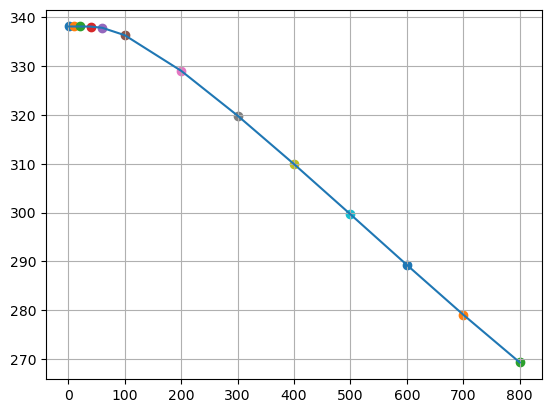

In [52]:
fig, ax = plt.subplots()
ax.grid() 
X=[]
Y=[]
X1=[]
Y1=[]
X2=[]
Y2=[]
X3=[]
Y3=[]
for i in range(len(t_b)):
    X.append(t_b[i][0])
    Y.append(t_b[i][1])
    ax.scatter(t_b[i][0],t_b[i][1])
    
# for i in range(len(data_1)):
#     X1.append(data_1[i][0])
#     Y1.append(data_1[i][1])
#     ax.scatter(data_1[i][0],data_1[i][1])
#     X2.append(data_2[i][0])
#     Y2.append(data_2[i][1])
#     ax.scatter(data_2[i][0],data_2[i][1])
#     X3.append(data_3[i][0])
#     Y3.append(data_3[i][1])
#     ax.scatter(data_3[i][0],data_3[i][1])
    
ax.plot(X,Y)
# ax.plot(X1,Y1)
# ax.plot(X2,Y2)
# ax.plot(X3,Y3)

In [53]:
all_ks=[]
for i in range(n_equi):
    for j in range(0,4):
        all_ks.append(all_d[i][j])

In [54]:
vol_m=bisection(p_FreeE(vol,513),0.0,0.04,100)

In [55]:
k_0=ks.subs(x,vol_m)
e_0=e0.subs(x,vol_m)/p_n_atom
ks_disp=[]
for i in range(n_equi):
    for k in range(equi_n[i]):
        for j in range(1,4):
            ks_disp.append(all_d[i][j].subs(x,vol_m))

In [56]:
ks_disp.sort()

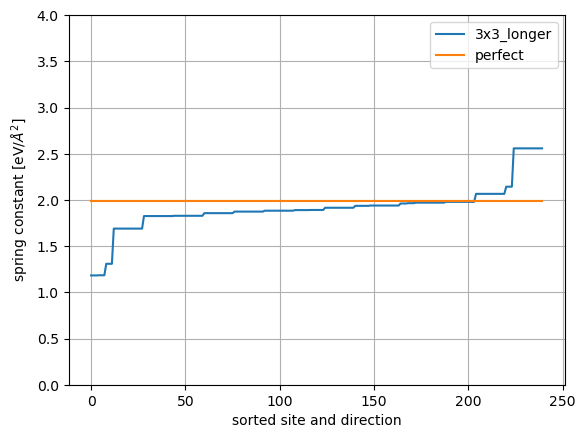

In [57]:
fig, ax = plt.subplots()
ax.grid() 
ax.set_xlabel('sorted site and direction')
ax.set_ylabel('spring constant [eV/$\AA^2$]')
ax.set_ylim([0,4])
X=[]
Y=[]
Y0=[] #k_0
for i in range(len(ks_disp)):
    X.append(i)
    Y.append(ks_disp[i])
    Y0.append(k_0)
    
ax.plot(X,Y,label='3x3_longer')
ax.plot(X,Y0,label='perfect')
ax.legend()

In [58]:
longer_3=[[1, 338.132390461730],
 [10, 338.132391317249],
 [20, 338.132362396296],
 [40, 338.106010398135],
 [60, 337.867049005937],
 [100, 336.348542175655],
 [200, 329.047882542708],
 [300, 319.863840433345],
 [400, 309.933767067760],
 [500, 299.652839935167],
 [600, 289.284462872507],
 [700, 279.079842086470],
 [800, 269.314823810191]]

In [59]:
tilt_6738=[
[0,428],
[10,428],
[20,428],
[50,428],
[70,428],
[100,425],
[200,415],
[300,402],
[400,390],
[500,377],
[600,358],
[800,345]]

In [60]:
tilt_2262=[
[0,470],
[10,470],
[20,470],
[50,470],
[70,470],
[100,465],
[200,448],
[300,428],
[400,408],
[500,385],
[600,365],
[800,315]]

In [61]:
data_1=[[483, 238.4008742], [523, 255.1871464], [573, 254.0183420], [623, 240.6976596]]
data_2=[[483, 305.0895028], [523, 302.7806612], [573, 298.7639658], [623, 283.9104760]]
data_3=[[483, 332.1325590], [523, 342.0692668], [573, 322.8707852], [623, 322.5701880]]

In [62]:
t_b3= [
    [1.0, 336.4556643],
    [10.0, 336.4556643],
    [20.0, 336.4556483],
    [40.0, 336.4450699],
    [60.0, 336.3119783],
    [100.0, 335.5593639],
    [200.0, 332.0835350],
    [300.0, 327.7498292],
    [400.0, 322.9435710],
    [500.0, 317.9459751],
    [600.0, 312.6768730],
    [800.0, 301.9093377]]

In [83]:
t_b5=[
    [1, 351.6001916],
    [10, 351.6001916], 
    [20, 351.6001902],
    [40, 351.5865260],
    [60, 351.4610464],
    [100, 350.6755698],
    [200, 346.9181174], 
    [300, 342.0449545],
    [400, 336.5194806],
    [500, 330.4669797],
    [600, 323.9499488],
    [800, 309.7254726]]
# from ???

In [85]:
t_b5=[[1, 337.440860684386],
 [10, 337.440861368311],
 [20, 337.440850253879],
 [40, 337.427725861155],
 [60, 337.307095268582],
 [100, 336.551532062918],
 [200, 332.936084338663],
 [300, 328.246749563975],
 [400, 322.929918841183],
 [500, 317.106451607867],
 [600, 310.836793644529],
 [700, 304.169656152082]]
# from horikawa_work/twist_5x5.ipynb

In [65]:
t_b7=[[1, 290.989264519741],
 [10, 290.989265458351],
 [20, 290.989254384452],
 [40, 290.973831940489],
 [60, 290.823688250011],
 [100, 289.839228663706],
 [200, 285.108104523230],
 [300, 279.302011775910],
 [400, 273.211973363008],
 [500, 267.098807968616],
 [600, 261.121956985459],
 [700, 255.423202297325],
 [800, 250.151269135399]]

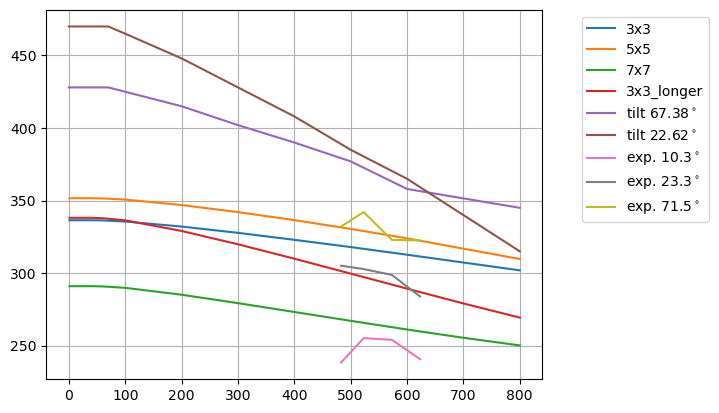

In [84]:
fig, ax = plt.subplots()
ax.grid()
labels=['3x3','5x5','7x7','3x3_longer','tilt 67.38$^\circ$','tilt 22.62$^\circ$','exp. 10.3$^\circ$','exp. 23.3$^\circ$','exp. 71.5$^\circ$',]
for i, system in enumerate([t_b3,t_b5,t_b7,longer_3,tilt_6738,tilt_2262,data_1,data_2,data_3]):
    x,y=np.transpose(system)
    ax.plot(x,y,label=labels[i])
ax.legend(bbox_to_anchor=(1.05, 1.0, 0.3,0), loc='upper right')

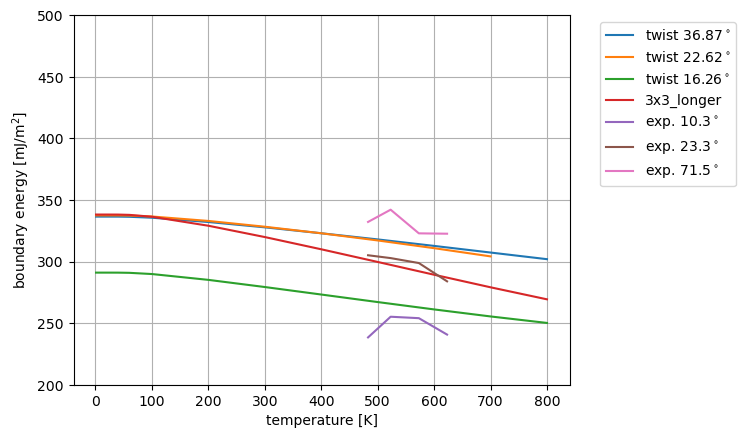

In [67]:
fig, ax = plt.subplots()
ax.grid()
ax.set_ylim([200,500])
ax.set_xlabel('temperature [K]')
ax.set_ylabel('boundary energy [mJ/m$^2$]')
labels=['twist 36.87$^\circ$','twist 22.62$^\circ$','twist 16.26$^\circ$','3x3_longer','exp. 10.3$^\circ$','exp. 23.3$^\circ$','exp. 71.5$^\circ$',]
for i, system in enumerate([t_b3,t_b5,t_b7,longer_3,data_1,data_2,data_3]):
    x,y=np.transpose(system)
    ax.plot(x,y,label=labels[i])
ax.legend(bbox_to_anchor=(1.05, 1.0, 0.3,0), loc='upper right')

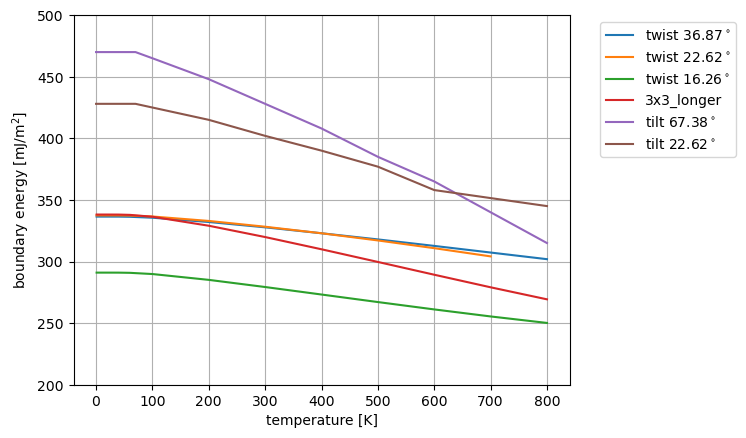

In [68]:
fig, ax = plt.subplots()
ax.grid()
ax.set_ylim([200,500])
ax.set_xlabel('temperature [K]')
ax.set_ylabel('boundary energy [mJ/m$^2$]')
labels=['twist 36.87$^\circ$','twist 22.62$^\circ$','twist 16.26$^\circ$','3x3_longer','tilt 67.38$^\circ$','tilt 22.62$^\circ$']
for i, system in enumerate([t_b3,t_b5,t_b7,longer_3,tilt_2262,tilt_6738]):
    x,y=np.transpose(system)
    ax.plot(x,y,label=labels[i])
ax.legend(bbox_to_anchor=(1.05, 1.0, 0.3,0), loc='upper right')

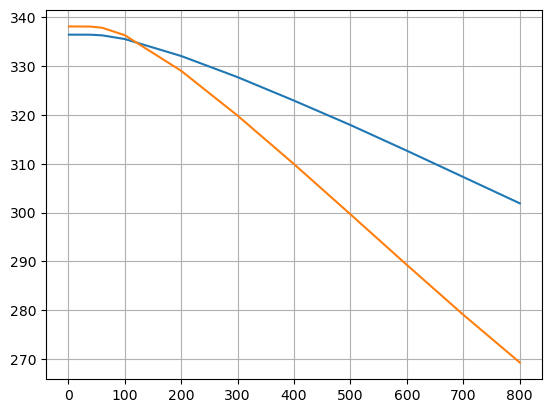

In [69]:
fig, ax = plt.subplots()
ax.grid()
for system in [t_b3,longer_3]:
    x,y=np.transpose(system)
    ax.plot(x,y)

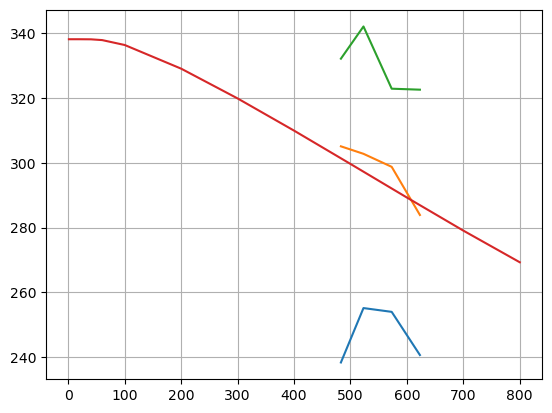

In [70]:
fig, ax = plt.subplots()
ax.grid()
for system in [data_1,data_2,data_3,longer_3]:
    x,y=np.transpose(system)
    ax.plot(x,y)

In [71]:
data=[[2.2972972972972974, 113.17829457364341],
[3.0743243243243246, 147.67441860465118],
[3.445945945945946, 142.24806201550388],
[4.662162162162162, 169.7674418604651],
[4.662162162162162, 181.0077519379845],
[5.506756756756757, 183.33333333333334],
[5.304054054054054, 185.6589147286822],
[5.405405405405405, 190.69767441860466],
[5.777027027027027, 208.52713178294576],
[9.29054054054054, 200.0],
[8.344594594594595, 222.09302325581396],
[8.108108108108109, 226.74418604651163],
[8.006756756756758, 245.34883720930233],
[8.378378378378379, 243.79844961240312],
[8.547297297297298, 235.6589147286822],
[8.851351351351353, 228.68217054263567],
[9.628378378378379, 233.33333333333334],
[10.16891891891892, 231.78294573643413],
[11.047297297297298, 228.29457364341087],
[10.506756756756758, 237.5968992248062],
[11.047297297297298, 242.6356589147287],
[9.932432432432433, 250.00000000000003],
[10.641891891891893, 258.91472868217056],
[10.54054054054054, 269.37984496124034],
[11.41891891891892, 265.50387596899225],
[11.554054054054054, 270.5426356589147],
[11.587837837837839, 274.4186046511628],
[11.925675675675677, 281.0077519379845],
[11.655405405405405, 260.8527131782946],
[12.162162162162163, 258.91472868217056],
[12.060810810810812, 252.32558139534885],
[12.871621621621623, 244.57364341085272],
[12.601351351351353, 251.93798449612405],
[13.108108108108109, 256.9767441860465],
[13.412162162162163, 264.72868217054264],
[13.243243243243244, 264.72868217054264],
[12.77027027027027, 275.968992248062],
[13.581081081081082, 234.10852713178295],
[13.310810810810812, 247.28682170542638],
[14.358108108108109, 244.18604651162792],
[15.067567567567568, 246.89922480620157],
[14.831081081081082, 248.8372093023256],
[14.662162162162163, 260.8527131782946],
[14.02027027027027, 259.68992248062017],
[14.662162162162163, 269.37984496124034],
[13.783783783783784, 287.2093023255814],
[14.72972972972973, 284.49612403100775],
[15.844594594594595, 291.0852713178295],
[16.62162162162162, 284.49612403100775],
[16.452702702702705, 279.8449612403101],
[15.97972972972973, 272.8682170542636],
[16.35135135135135, 271.3178294573644],
[17.263513513513516, 263.95348837209303],
[16.79054054054054, 239.53488372093025],
[17.972972972972975, 302.71317829457365],
[17.93918918918919, 295.73643410852713],
[17.804054054054056, 284.108527131783],
[18.37837837837838, 285.6589147286822],
[19.29054054054054, 262.4031007751938],
[19.7972972972973, 260.077519379845],
[19.594594594594597, 286.4341085271318],
[19.18918918918919, 301.16279069767444],
[19.222972972972975, 313.95348837209303],
[19.966216216216218, 276.35658914728685],
[20.202702702702705, 281.3953488372093],
[20.27027027027027, 292.2480620155039],
[20.54054054054054, 292.2480620155039],
[21.52027027027027, 301.16279069767444],
[20.87837837837838, 279.0697674418605],
[21.14864864864865, 270.5426356589147],
[21.68918918918919, 281.0077519379845],
[21.756756756756758, 274.031007751938],
[22.2972972972973, 268.60465116279073],
[22.39864864864865, 276.35658914728685],
[22.905405405405407, 273.6434108527132],
[23.277027027027028, 265.1162790697675],
[23.783783783783786, 281.7829457364341],
[23.716216216216218, 295.73643410852713],
[24.054054054054056, 294.57364341085275],
[24.35810810810811, 282.94573643410854],
[24.054054054054056, 274.4186046511628],
[24.45945945945946, 271.3178294573644],
[24.7972972972973, 277.13178294573646],
[25.33783783783784, 286.82170542635663],
[25.135135135135137, 290.69767441860466],
[25.16891891891892, 269.37984496124034],
[26.182432432432435, 264.72868217054264],
[26.114864864864867, 268.2170542635659],
[26.182432432432435, 271.3178294573644],
[26.486486486486488, 272.48062015503876],
[26.41891891891892, 285.27131782945736],
[26.41891891891892, 293.0232558139535],
[25.945945945945947, 294.1860465116279],
[26.25, 299.6124031007752],
[25.945945945945947, 302.71317829457365],
[25.405405405405407, 307.36434108527135],
[25.304054054054056, 314.72868217054264],
[26.31756756756757, 318.2170542635659],
[26.993243243243246, 288.37209302325584],
[26.993243243243246, 294.1860465116279],
[26.993243243243246, 299.2248062015504],
[27.56756756756757, 312.7906976744186],
[27.77027027027027, 308.52713178294573],
[27.56756756756757, 298.4496124031008],
[27.635135135135137, 295.73643410852713],
[28.243243243243246, 303.48837209302326],
[28.243243243243246, 297.28682170542635],
[28.47972972972973, 281.7829457364341],
[29.155405405405407, 276.74418604651163],
[29.08783783783784, 285.6589147286822],
[29.560810810810814, 297.28682170542635],
[29.89864864864865, 293.4108527131783],
[30.844594594594597, 308.52713178294573],
[30.675675675675677, 291.47286821705427],
[30.777027027027028, 286.82170542635663],
[31.114864864864867, 272.8682170542636],
[32.39864864864865, 272.48062015503876],
[32.12837837837838, 287.2093023255814],
[32.7027027027027, 282.17054263565893],
[33.58108108108108, 282.17054263565893],
[32.7027027027027, 296.8992248062016],
[32.972972972972975, 301.93798449612405],
[33.3445945945946, 305.4263565891473],
[33.78378378378378, 305.4263565891473],
[33.98648648648649, 295.73643410852713],
[34.020270270270274, 293.4108527131783],
[34.49324324324324, 280.6201550387597],
[35.270270270270274, 274.80620155038764],
[35.33783783783784, 283.33333333333337],
[34.86486486486487, 289.14728682170545],
[35.54054054054054, 289.5348837209302],
[36.0472972972973, 290.3100775193799],
[36.11486486486487, 305.81395348837214],
[36.48648648648649, 301.16279069767444],
[37.66891891891892, 281.3953488372093],
[37.66891891891892, 273.25581395348837],
[38.37837837837838, 273.25581395348837],
[39.020270270270274, 283.33333333333337],
[39.391891891891895, 303.8759689922481],
[39.89864864864865, 293.7984496124031],
[40.472972972972975, 295.73643410852713],
[39.7972972972973, 309.68992248062017],
[40.0, 305.4263565891473],
[40.472972972972975, 307.7519379844961],
[41.11486486486487, 305.0387596899225],
[41.25, 310.077519379845],
[41.79054054054054, 315.1162790697675],
[41.58783783783784, 288.7596899224806],
[41.82432432432433, 284.8837209302326],
[42.46621621621622, 295.34883720930236],
[42.73648648648649, 294.57364341085275],
[43.00675675675676, 298.8372093023256],
[43.37837837837838, 305.81395348837214],
[43.61486486486487, 292.6356589147287],
[44.52702702702703, 295.34883720930236],
[44.763513513513516, 304.26356589147287],
[44.72972972972973, 320.5426356589147],
[46.25, 313.95348837209303],
[45.33783783783784, 308.13953488372096],
[45.91216216216216, 299.6124031007752],
[46.351351351351354, 297.28682170542635]]

In [72]:
x=[]
y=[]
for ele in data:
    x.append(ele[0])
    y.append(ele[1])

In [81]:
data7= [500, 267.098807968616]
data5=[500,330.4669797]#5x5 500Kにおける粒界エネルギー from ???
data5=[500,317.106451607867]#5x5 500Kにおける粒界エネルギー from horikawa_work/twist_5x5.ipynb
data3=[500.0, 317.9459751]#3x3 500Kにおける粒界エネルギー
data3_longer=[500, 299.652839935167]

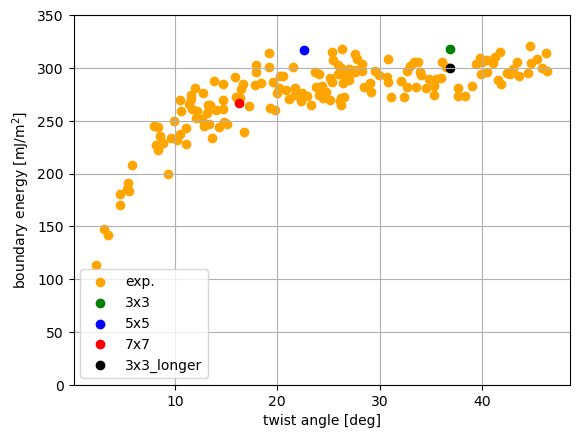

In [82]:
fig, ax = plt.subplots()
ax.grid() 
ax.set_ylim([0,350])
ax.set_xlabel('twist angle [deg]')
ax.set_ylabel('boundary energy [mJ/m$^2$]')
ax.scatter(x,y,color='orange',label='exp.')
ax.scatter(36.87,data3[1],color='green',label='3x3')
ax.scatter(22.62,data5[1],color='blue',label='5x5')
ax.scatter(16.26,data7[1],color='red',label='7x7')
ax.scatter(36.87,data3_longer[1],color='black',label='3x3_longer')
ax.legend()